In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
data1=pd.read_csv("crime_data.csv")
data1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
d1_norm = norm_func(data1.iloc[:,1:])
d1_norm.head()


,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [11]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')

In [12]:
y_hc = hc.fit_predict(d1_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [13]:
d1_norm['h_clusterid'] = Clusters

In [14]:
d1_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,2
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0


In [15]:
data2=data1.copy()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data2.iloc[:,1:])

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


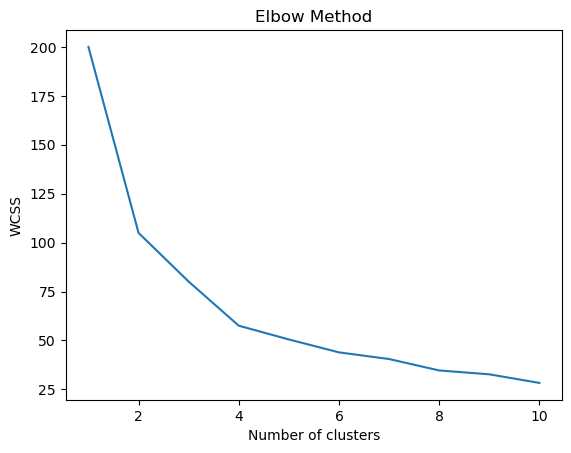

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [20]:
data2['clusterid_new'] = clusters_new.labels_

In [21]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [22]:
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [24]:
data2.groupby('clusterid_new').agg(['mean']).reset_index()

C:\Users\prasa\AppData\Local\Temp\ipykernel_11436\2880607697.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data2.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [25]:
data2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


# DBSCAN

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data3=pd.read_csv("crime_data.csv")
data3.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [35]:
data3.drop(['Unnamed: 0'],axis=1,inplace=True)

In [36]:
array=data3.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [37]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [38]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [39]:
dbscan = DBSCAN(eps=2,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=2)

In [42]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [44]:
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [46]:
pd.concat([data3,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0
